In [55]:
#Imports
import fastf1
import matplotlib.pyplot as plt

fastf1.Cache.enable_cache('cache')

In [56]:
#Test data (change as needed)
year = 2025
gp = 'Monaco'
session_type = 'Race' #FP1, FP2, FP3, Qualifying or Race

drivers = ['VER', 'LEC', 'HAM', 'PIA'] #Which drivers to load data

In [57]:
# Load the session
session = fastf1.get_session(year, gp, session_type)
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '1', '44', '6', '31', '30', '23', '55', '63', '87', '43', '5', '18', '27', '22', '12', '14', '10']


In [58]:
# Load driver data
driver_data = {}
for drv in drivers:
    driver_data[drv] = session.laps.pick_drivers(drv)

In [59]:
#Plotting functions
def plot_lap_times(laps, driver):  #Lap times for a driver
    lap_times_sec = laps['LapTime'].dt.total_seconds()
    plt.figure(figsize=(10,6))
    plt.plot(laps['LapNumber'], lap_times_sec, label=driver, color = 'red')
    fastest_lap = lap_times_sec.min()
    fastest_lap_num = laps[laps['LapTime'] == laps['LapTime'].min()]['LapNumber'].values[0]
    lap_std = laps['LapTime'].dt.total_seconds().std()
    plt.axvline(x=fastest_lap_num, color='green', linestyle='--', label='Fastest Lap')
    print(f"Fastest lap: {fastest_lap:.2f}s (Lap {fastest_lap_num})")
    print(f"Average lap: {lap_times_sec.mean():.2f}s")
    print(f"Slowest lap: {lap_times_sec.max():.2f}s")
    print(f"Lap time standard deviation: {lap_std:.2f}s")
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time')
    plt.title(f'Lap Times for {driver}')
    plt.legend()
    plt.show()

def plot_multiple_drivers(driver_data):    #Lap times for multiple drivers
    plt.figure(figsize=(12,7))
    for driver, laps in driver_data.items():
        plt.plot(laps['LapNumber'], laps['LapTime'], marker='o', label=driver)
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time')
    plt.title(f'Lap Times Comparison')
    plt.legend()
    plt.show()

def plot_lap_deltas(laps, driver):
    driver_laps = laps.pick_drivers(driver)
    lap_deltas = driver_laps['LapTime'].dt.total_seconds().diff()
    plt.figure(figsize=(10,6))
    plt.plot(driver_laps['LapNumber'], lap_deltas, marker='o', color='orange')
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time Delta (s)')
    plt.title(f'Lap-to-lap Time Differences - {driver}')
    plt.show() 

Fastest lap: 74.06s (Lap 36.0)
Average lap: 77.40s
Slowest lap: 108.81s
Lap time standard deviation: 6.41s


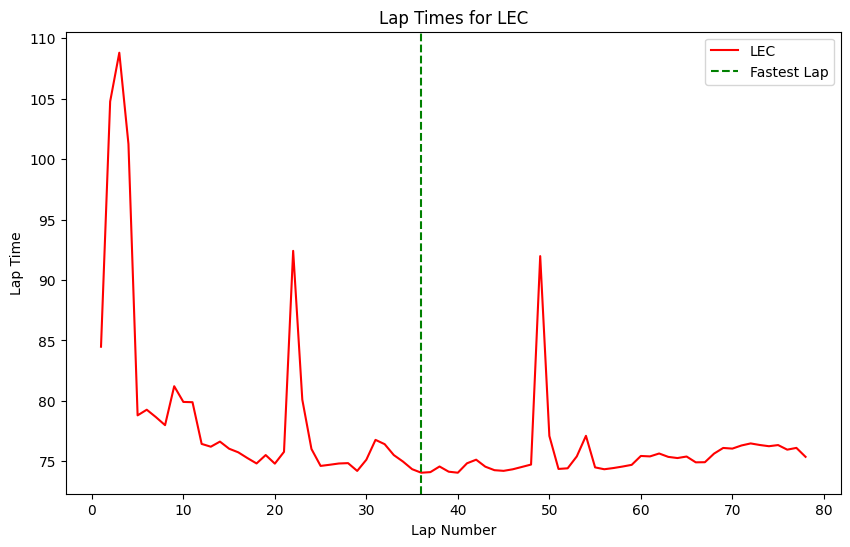

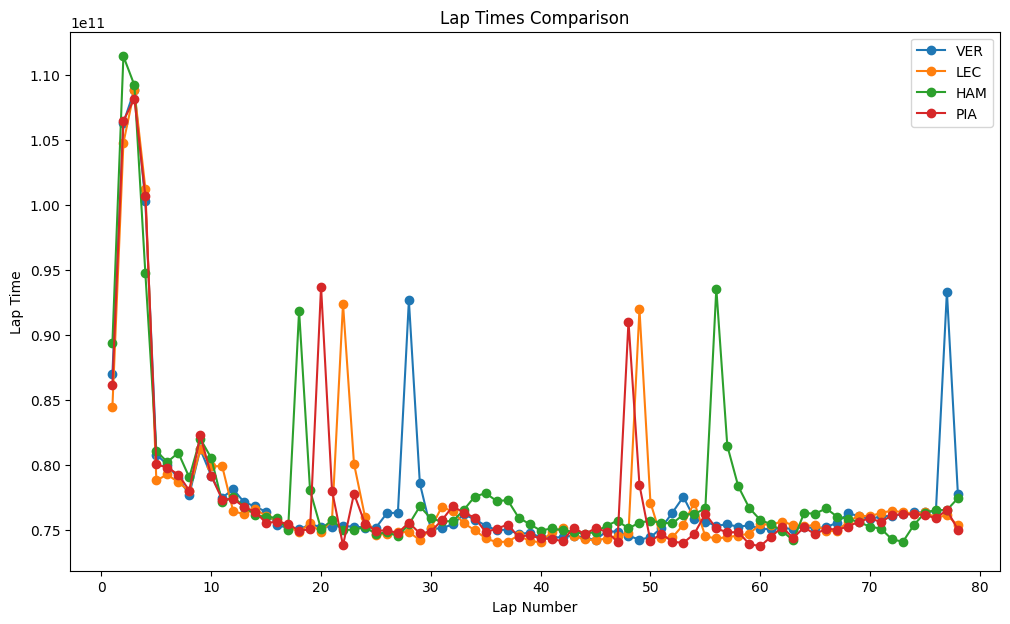

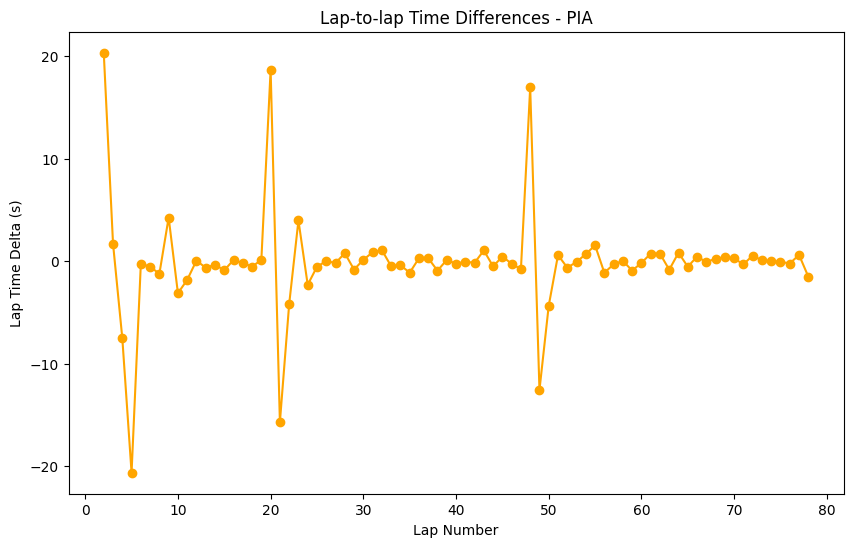

In [60]:
#Testing functions
plot_lap_times(driver_data['LEC'], 'LEC')
plot_multiple_drivers(driver_data)
plot_lap_deltas(driver_data['PIA'], 'PIA')